# ДЗ4 по Python Оцениваемое (HW4)


## Задание 1


1. Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.
2. Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл. Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.
3. Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

In [16]:
with open("Harry_Potter_and_the_Sorcerers_Stone.txt", "r", encoding="utf-8") as f:
    text = f.read() 

In [19]:
import string
text = ''.join(ch.lower() for ch in text if ch not in set(string.punctuation))

In [22]:
import nltk
nltk.download()

from nltk.stem import PorterStemmer
#лемматизируем текст
porter = PorterStemmer()

lem_text = [porter.stem(word) for word in text.split()] 

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [23]:
print(lem_text)

['chapter', 'one', 'the', 'boy', 'who', 'live', 'mr', 'and', 'mr', 'dursley', 'of', 'number', 'four', 'privet', 'drive', 'were', 'proud', 'to', 'say', 'that', 'they', 'were', 'perfectli', 'normal', 'thank', 'you', 'veri', 'much', 'they', 'were', 'the', 'last', 'peopl', 'youd', 'expect', 'to', 'be', 'involv', 'in', 'anyth', 'strang', 'or', 'mysteri', 'becaus', 'they', 'just', 'didnt', 'hold', 'with', 'such', 'nonsens', 'mr', 'dursley', 'wa', 'the', 'director', 'of', 'a', 'firm', 'call', 'grun', 'which', 'made', 'drill', 'he', 'wa', 'a', 'big', 'beefi', 'man', 'with', 'hardli', 'ani', 'neck', 'although', 'he', 'did', 'have', 'a', 'veri', 'larg', 'mustach', 'mr', 'dursley', 'wa', 'thin', 'and', 'blond', 'and', 'had', 'nearli', 'twice', 'the', 'usual', 'amount', 'of', 'neck', 'which', 'came', 'in', 'veri', 'use', 'as', 'she', 'spent', 'so', 'much', 'of', 'her', 'time', 'crane', 'over', 'garden', 'fenc', 'spi', 'on', 'the', 'neighbor', 'the', 'dursley', 'had', 'a', 'small', 'son', 'call', '

In [25]:
with open('lemmas.txt', 'w', encoding='utf-8') as f: 
    f.write(' '.join(lem_text))

In [35]:
#считаем x - ранг слова в отсортированном частотном словаре
from collections import Counter 

#с помощью counts считаем частотность слов в тексте
word_counts = dict(Counter(lem_text))
word_counts = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True))
serial_numbers = {key: rank for rank, key in enumerate(sorted(word_counts, key=word_counts.get), 1)}

In [39]:
#считаем y - относительная частота 

text_len = len(lem_text) 
word_freq = {key: value / text_len for key, value in word_counts.items()} 
word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True))

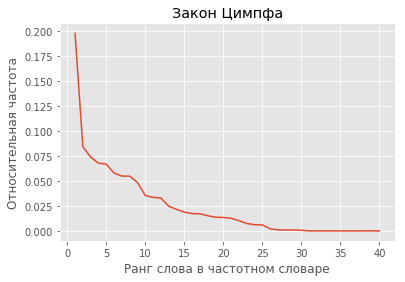

In [40]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style  #добавляем стили
style.use('ggplot')  #выбираем стиль ggplot

X = list(serial_numbers.values()) #достаем из словаря только значения и делаем из этого массив
Y = list(word_freq.values())
         
plt.plot(X,Y),
plt.title("Закон Цимпфа")
plt.xlabel("Ранг слова в частотном словаре")
plt.ylabel("Относительная частота")
plt.show()

In [41]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('english')

text_without_stop = [word for word in word_tokenize(lem_text) if word not in stop_words]

In [47]:
#с помощью counts считаем частотность слов в тексте
words_count = dict(Counter(text_without_stop))

words_count = dict(sorted(words_count.items(), key=lambda x: x[1], reverse=True))

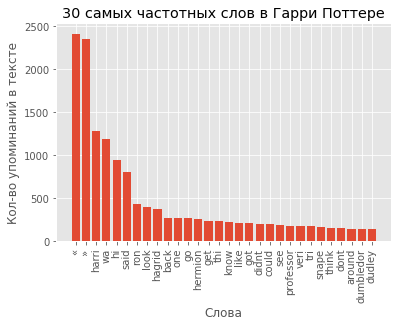

In [48]:
X = range(0,30) #берем только первые 30 слов
Y = list(words_count.values())[:30]

plt.bar(X, Y)
plt.xticks(X, words_count.keys(), rotation=90) #делаем подписи по оси x - слова
plt.title("30 самых частотных слов в Гарри Поттере")
plt.xlabel("Слова")
plt.ylabel("Кол-во упоминаний в тексте")
plt.show()